In [1]:
import numpy as np
from neural_network_in_TensorFlow import NeuralNetworkTF
from tensorflow.python.framework import ops

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap 
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
X, y = make_moons(noise=0.3, random_state=0, n_samples=5000)
#Y = np.reshape(Y, newshape=(len(Y), 1))
Y = np.eye(2)[y.reshape(-1)]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

In [3]:
X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5000, 2), (5000, 2), (2, 4000), (2, 1000), (2, 4000), (2, 1000))

In [4]:
def adjustAxeProperties(ax_obj, x_fontsize, x_rotation, y_fontsize, y_rotation):
    for tick in ax_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_fontsize)
        tick.label.set_rotation(x_rotation)
    for tick in ax_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_fontsize)
        tick.label.set_rotation(y_rotation)

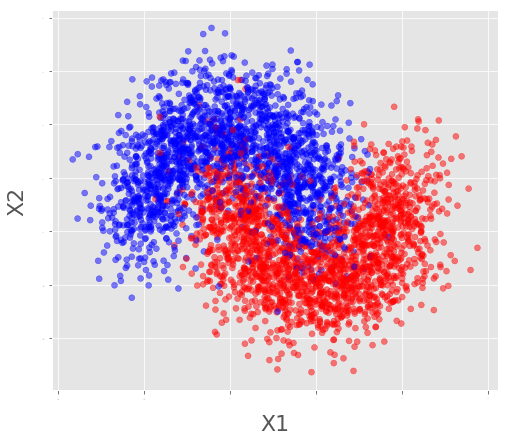

In [5]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

plt.close('close')
fig, ax = plt.subplots(1, figsize=(8, 7))
ax.scatter(X_train[0,:], X_train[1,:], c=Y_train[0,:], cmap=cm_bright, alpha=0.5)

FONTSIZE = 22
ax.set_xlabel('X1', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('X2', fontsize=FONTSIZE, labelpad=15)
adjustAxeProperties(ax, 0, FONTSIZE, 0, FONTSIZE)

In [11]:
layers_dims = [X_train.shape[0], 10, 10, 5, Y_train.shape[0]]
nn = NeuralNetworkTF(layers_dims)
costs = nn.fit(X_train, Y_train, learning_rate=0.003, num_epochs=400, mini_batch_size=128)


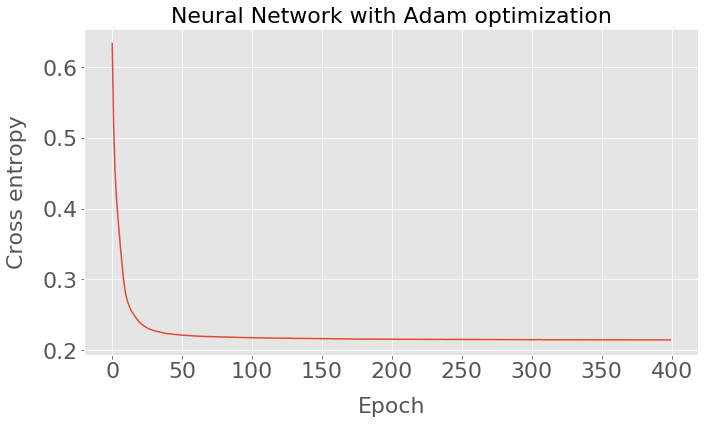

In [12]:
plt.close('close')
fig, ax = plt.subplots(1, figsize=(11, 6))
ax.plot(costs)

FONTSIZE = 22
ax.set_xlabel('Epoch', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Cross entropy', fontsize=FONTSIZE, labelpad=15)

adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
t = ax.set_title('Neural Network with Adam optimization', fontsize=FONTSIZE)

In [8]:
train_probas = nn.predict_probas(X_train)
train_roc_auc = roc_auc_score(Y_train[1,:], train_probas[1,:])
train_fpr, train_tpr, _ = roc_curve(Y_train[1,:], train_probas[1,:])

test_probas = nn.predict_probas(X_test)
test_roc_auc = roc_auc_score(Y_test[1,:], test_probas[1,:])
test_fpr, test_tpr, _ = roc_curve(Y_test[1,:], test_probas[1,:])


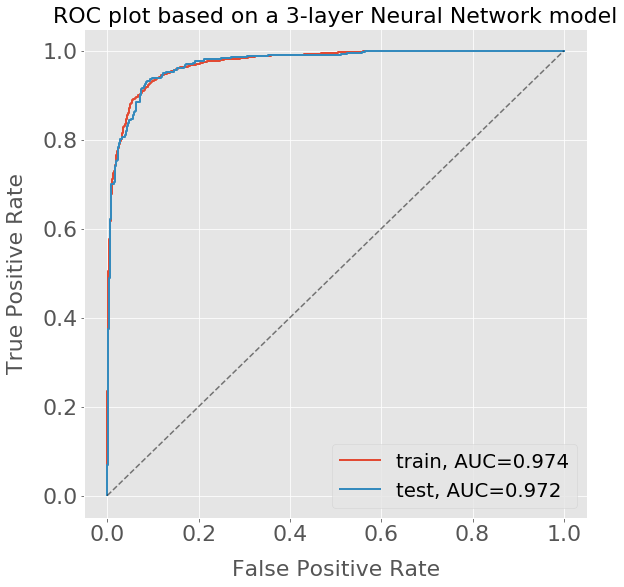

In [9]:
FONTSIZE = 22
fig, ax = plt.subplots(1, figsize=(9, 9))
train_pl, = ax.plot(train_fpr, train_tpr, lw=2, markersize=0, label='train')
test_pl, = ax.plot(test_fpr, test_tpr, lw=2, markersize=0, label='test')
ax.plot([0, 1], [0, 1], 'k--', alpha=0.5)
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)
ax.set_xlabel('False Positive Rate', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('True Positive Rate', fontsize=FONTSIZE, labelpad=15)
ax.legend([train_pl, test_pl], 
          ['train, AUC={0:.3f}'.format(train_roc_auc), 'test, AUC={0:.3f}'.format(test_roc_auc)],
          fontsize=FONTSIZE*0.9, loc='best')
t = ax.set_title('ROC plot based on a 3-layer Neural Network model', fontsize=FONTSIZE)